In [14]:
import pandas as pd

# Load datasets
hotels = pd.read_csv('/kaggle/input/international-hotel-booking-analytics/hotels.csv')
reviews = pd.read_csv('/kaggle/input/international-hotel-booking-analytics/reviews.csv')
users = pd.read_csv('/kaggle/input/international-hotel-booking-analytics/users.csv')

# Show basic info
print("=== Hotels ===")
display(hotels.head())
print(hotels.info())

print("\n=== Reviews ===")
display(reviews.head())
print(reviews.info())

print("\n=== Users ===")
display(users.head())
print(users.info())


=== Hotels ===


,hotel_id,hotel_name,city,country,star_rating,lat,lon,cleanliness_base,comfort_base,facilities_base,location_base,staff_base,value_for_money_base
0,1,The Azure Tower,New York,United States,5,40.7580,-73.9855,9.1,8.8,8.9,9.5,8.6,8.0
1,2,The Royal Compass,London,United Kingdom,5,51.5072,-0.1276,9.0,9.2,8.8,9.4,9.0,7.9
2,3,L'Étoile Palace,Paris,France,5,48.8566,2.3522,8.8,9.4,8.7,9.6,9.3,8.1
3,4,Kyo-to Grand,Tokyo,Japan,5,35.6895,139.6917,9.6,9.0,9.3,8.5,9.5,8.2
4,5,The Golden Oasis,Dubai,United Arab Emirates,5,25.2769,55.2962,9.3,9.5,9.6,8.9,9.4,8.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hotel_id              25 non-null     int64  
 1   hotel_name            25 non-null     object 
 2   city                  25 non-null     object 
 3   country               25 non-null     object 
 4   star_rating           25 non-null     int64  
 5   lat                   25 non-null     float64
 6   lon                   25 non-null     float64
 7   cleanliness_base      25 non-null     float64
 8   comfort_base          25 non-null     float64
 9   facilities_base       25 non-null     float64
 10  location_base         25 non-null     float64
 11  staff_base            25 non-null     float64
 12  value_for_money_base  25 non-null     float64
dtypes: float64(8), int64(2), object(3)
memory usage: 2.7+ KB
None

=== Reviews ===


,review_id,user_id,hotel_id,review_date,score_overall,score_cleanliness,score_comfort,score_facilities,score_location,score_staff,score_value_for_money,review_text
0,1,1600,1,2022-10-07,8.7,8.6,8.7,8.5,9.0,8.8,8.7,Practice reduce young our because machine. Rec...
1,2,432,4,2020-03-24,9.1,10.0,9.1,9.0,8.6,9.4,8.6,Test cover traditional black. Process tell Mr ...
2,3,186,18,2023-12-18,8.8,9.7,8.8,8.3,8.7,8.1,8.6,Friend million student social study yeah. Grow...
3,4,1403,19,2022-06-22,8.9,9.0,8.8,8.5,9.6,9.1,8.3,Huge girl already remain truth behind card. Ap...
4,5,1723,17,2022-07-02,9.1,8.9,9.5,9.3,8.3,9.4,8.9,Cover feeling call community serve television ...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   review_id              50000 non-null  int64  
 1   user_id                50000 non-null  int64  
 2   hotel_id               50000 non-null  int64  
 3   review_date            50000 non-null  object 
 4   score_overall          50000 non-null  float64
 5   score_cleanliness      50000 non-null  float64
 6   score_comfort          50000 non-null  float64
 7   score_facilities       50000 non-null  float64
 8   score_location         50000 non-null  float64
 9   score_staff            50000 non-null  float64
 10  score_value_for_money  50000 non-null  float64
 11  review_text            50000 non-null  object 
dtypes: float64(7), int64(3), object(2)
memory usage: 4.6+ MB
None

=== Users ===


,user_id,user_gender,country,age_group,traveller_type,join_date
0,1,Female,United Kingdom,35-44,Solo,2024-09-29
1,2,Male,United Kingdom,25-34,Solo,2023-11-29
2,3,Female,Mexico,25-34,Family,2022-04-03
3,4,Male,India,35-44,Family,2023-12-02
4,5,Other,Japan,25-34,Solo,2021-12-18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         2000 non-null   int64 
 1   user_gender     2000 non-null   object
 2   country         2000 non-null   object
 3   age_group       2000 non-null   object
 4   traveller_type  2000 non-null   object
 5   join_date       2000 non-null   object
dtypes: int64(1), object(5)
memory usage: 93.9+ KB
None


In [15]:
merged_df = (
    reviews
    .merge(users, on='user_id', how='left')
    .merge(hotels, on='hotel_id', how='left')
)

print("Merged shape:", merged_df.shape)
display(merged_df.head())


Merged shape: (50000, 29)


,review_id,user_id,hotel_id,review_date,score_overall,score_cleanliness,score_comfort,score_facilities,score_location,score_staff,...,country_y,star_rating,lat,lon,cleanliness_base,comfort_base,facilities_base,location_base,staff_base,value_for_money_base
0,1,1600,1,2022-10-07,8.7,8.6,8.7,8.5,9.0,8.8,...,United States,5,40.7580,-73.9855,9.1,8.8,8.9,9.5,8.6,8.0
1,2,432,4,2020-03-24,9.1,10.0,9.1,9.0,8.6,9.4,...,Japan,5,35.6895,139.6917,9.6,9.0,9.3,8.5,9.5,8.2
2,3,186,18,2023-12-18,8.8,9.7,8.8,8.3,8.7,8.1,...,Egypt,5,30.0444,31.2357,8.8,8.7,8.6,9.1,8.7,8.4
3,4,1403,19,2022-06-22,8.9,9.0,8.8,8.5,9.6,9.1,...,Spain,5,41.3851,2.1734,9.2,9.1,8.9,9.7,9.0,8.8
4,5,1723,17,2022-07-02,9.1,8.9,9.5,9.3,8.3,9.4,...,Russia,5,55.7558,37.6173,9.1,9.3,9.0,9.0,9.1,8.6


Best city per traveller type:


,traveller_type,city,score_overall
0,Business,Dubai,8.965668
1,Couple,Amsterdam,9.096989
2,Family,Dubai,9.214381
3,Solo,Amsterdam,9.108454


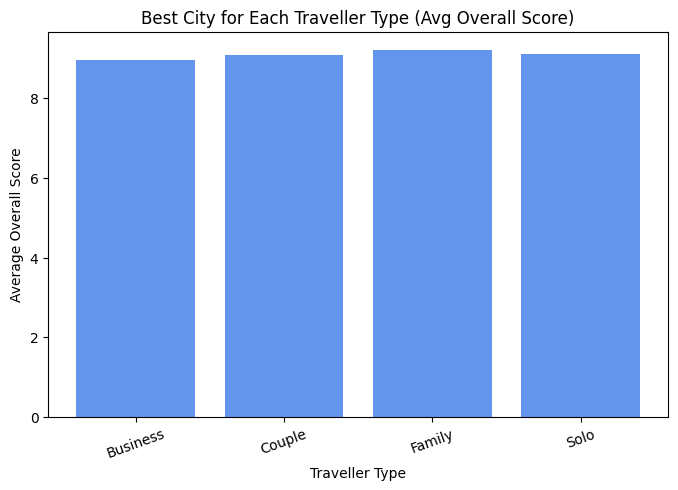

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Average overall score per (traveller_type, city)
city_scores = (
    merged_df.groupby(['traveller_type', 'city'])['score_overall']
    .mean()
    .reset_index()
)

# Pick the top city for each traveller_type
best_city_per_type = (
    city_scores.loc[city_scores.groupby('traveller_type')['score_overall'].idxmax()]
    .reset_index(drop=True)
)

print("Best city per traveller type:")
display(best_city_per_type)

# Bar plot
plt.figure(figsize=(8,5))
plt.bar(best_city_per_type['traveller_type'], best_city_per_type['score_overall'], color='cornflowerblue')
plt.title("Best City for Each Traveller Type (Avg Overall Score)")
plt.xlabel("Traveller Type")
plt.ylabel("Average Overall Score")
plt.xticks(rotation=20)
plt.show()


Top 3 countries per age group (based on Value for Money):


/tmp/ipykernel_37/2216497691.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top3 = country_value.groupby('age_group').apply(


,age_group,user_country,score_value_for_money
0,18-24,Egypt,9.007317
1,18-24,Spain,8.768132
2,18-24,Argentina,8.689000
3,25-34,Spain,8.733259
4,25-34,South Korea,8.632800
5,25-34,Netherlands,8.542157
6,35-44,Singapore,8.795385
7,35-44,Argentina,8.696519
8,35-44,New Zealand,8.641079
9,45-54,Turkey,8.641778


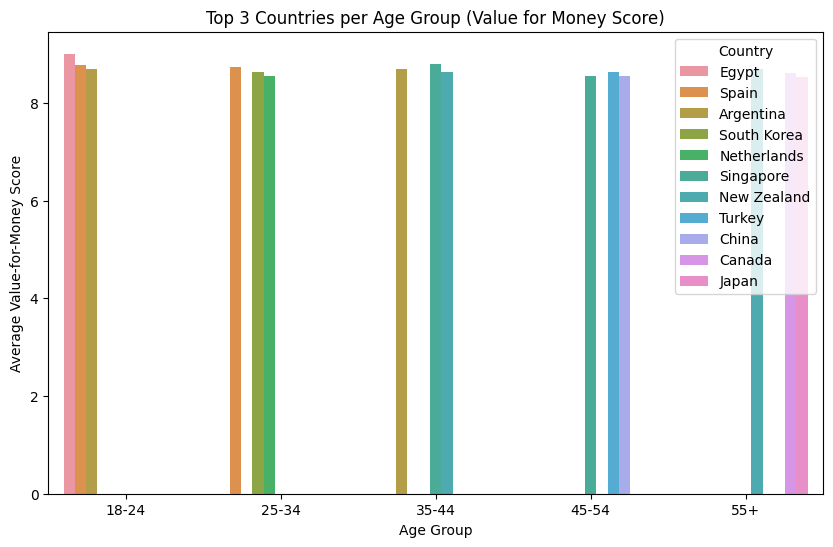

In [17]:
import seaborn as sns

# Average value-for-money per (age_group, country)
country_value = (
    merged_df.groupby(['age_group', 'country_x'])['score_value_for_money']
    .mean()
    .reset_index()
    .rename(columns={'country_x': 'user_country'})
)

# Get top 3 countries per age group
top3 = country_value.groupby('age_group').apply(
    lambda x: x.nlargest(3, 'score_value_for_money')
).reset_index(drop=True)

print("Top 3 countries per age group (based on Value for Money):")
display(top3)

# Visualize
plt.figure(figsize=(10,6))
sns.barplot(data=top3, x='age_group', y='score_value_for_money', hue='user_country')
plt.title("Top 3 Countries per Age Group (Value for Money Score)")
plt.ylabel("Average Value-for-Money Score")
plt.xlabel("Age Group")
plt.legend(title="Country")
plt.show()


In [18]:
# Step 1: Create a dictionary mapping each country to its group
country_to_group = {
    # North America
    'United States': 'North_America',
    'Canada': 'North_America',
    
    # Western Europe
    'Germany': 'Western_Europe',
    'France': 'Western_Europe',
    'United Kingdom': 'Western_Europe',
    'Netherlands': 'Western_Europe',
    'Spain': 'Western_Europe',
    'Italy': 'Western_Europe',
    
    # Eastern Europe
    'Russia': 'Eastern_Europe',
    
    # East Asia
    'China': 'East_Asia',
    'Japan': 'East_Asia',
    'South Korea': 'East_Asia',
    
    # Southeast Asia
    'Thailand': 'Southeast_Asia',
    'Singapore': 'Southeast_Asia',
    
    # Middle East
    'United Arab Emirates': 'Middle_East',
    'Turkey': 'Middle_East',
    
    # Africa
    'Egypt': 'Africa',
    'Nigeria': 'Africa',
    'South Africa': 'Africa',
    
    # Oceania
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',
    
    # South America
    'Brazil': 'South_America',
    'Argentina': 'South_America',
    
    # South Asia
    'India': 'South_Asia',
    
    # North America Mexico
    'Mexico': 'North_America_Mexico'
}


In [19]:
# Create the new column 'country_group' based on user's country
merged_df['country_group'] = merged_df['country_y'].map(country_to_group)

# Check if any country didn't match (to fix typos)
print("Missing group for these countries:")
print(merged_df[merged_df['country_group'].isnull()]['country_y'].unique())

# Drop rows where the mapping failed (optional, usually few)
merged_df = merged_df.dropna(subset=['country_group'])

# Confirm the column is added
merged_df[['country_y', 'country_group']].head(10)


Missing group for these countries:
[]


,country_y,country_group
0,United States,North_America
1,Japan,East_Asia
2,Egypt,Africa
3,Spain,Western_Europe
4,Russia,Eastern_Europe
5,Australia,Oceania
6,Argentina,South_America
7,Singapore,Southeast_Asia
8,India,South_Asia
9,South Africa,Africa


In [20]:
#version 2 with different encoding way
# STEP 2.2 — Select Feature Columns
import pandas as pd

# Define the columns we want to use
feature_cols = [
    'user_gender', 'traveller_type', 'age_group',      # user info                               # hotel info
    'star_rating',
    'score_overall', 'score_cleanliness', 'score_comfort',
    'score_facilities', 'score_location', 'score_staff',
    'score_value_for_money','cleanliness_base',	'comfort_base',	'facilities_base',	'location_base',	'staff_base','value_for_money_base'
]

target_col = 'country_group'

# Extract X and y
X = merged_df[feature_cols].copy()
y = merged_df[target_col].copy()

print("X shape:", X.shape)
print("y shape:", y.shape)
X.head()


X shape: (50000, 17)
y shape: (50000,)


,user_gender,traveller_type,age_group,star_rating,score_overall,score_cleanliness,score_comfort,score_facilities,score_location,score_staff,score_value_for_money,cleanliness_base,comfort_base,facilities_base,location_base,staff_base,value_for_money_base
0,Female,Solo,25-34,5,8.7,8.6,8.7,8.5,9.0,8.8,8.7,9.1,8.8,8.9,9.5,8.6,8.0
1,Female,Couple,35-44,5,9.1,10.0,9.1,9.0,8.6,9.4,8.6,9.6,9.0,9.3,8.5,9.5,8.2
2,Female,Couple,55+,5,8.8,9.7,8.8,8.3,8.7,8.1,8.6,8.8,8.7,8.6,9.1,8.7,8.4
3,Female,Business,35-44,5,8.9,9.0,8.8,8.5,9.6,9.1,8.3,9.2,9.1,8.9,9.7,9.0,8.8
4,Male,Family,45-54,5,9.1,8.9,9.5,9.3,8.3,9.4,8.9,9.1,9.3,9.0,9.0,9.1,8.6


In [21]:
#version 2 with different encoding way
# STEP 2.3 — Encode Categorical Columns (no one-hot)
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['user_gender', 'traveller_type', 'age_group']

# Dictionary to store encoders so we can decode later if needed
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le  # keep each encoder

# Encode the target variable as well
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

print("✅ Encoding complete")
print("Target mapping:")
print(dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_))))
X.head()



✅ Encoding complete
Target mapping:
{'Africa': 0, 'East_Asia': 1, 'Eastern_Europe': 2, 'Middle_East': 3, 'North_America': 4, 'North_America_Mexico': 5, 'Oceania': 6, 'South_America': 7, 'South_Asia': 8, 'Southeast_Asia': 9, 'Western_Europe': 10}


,user_gender,traveller_type,age_group,star_rating,score_overall,score_cleanliness,score_comfort,score_facilities,score_location,score_staff,score_value_for_money,cleanliness_base,comfort_base,facilities_base,location_base,staff_base,value_for_money_base
0,0,3,1,5,8.7,8.6,8.7,8.5,9.0,8.8,8.7,9.1,8.8,8.9,9.5,8.6,8.0
1,0,1,2,5,9.1,10.0,9.1,9.0,8.6,9.4,8.6,9.6,9.0,9.3,8.5,9.5,8.2
2,0,1,4,5,8.8,9.7,8.8,8.3,8.7,8.1,8.6,8.8,8.7,8.6,9.1,8.7,8.4
3,0,0,2,5,8.9,9.0,8.8,8.5,9.6,9.1,8.3,9.2,9.1,8.9,9.7,9.0,8.8
4,1,2,3,5,9.1,8.9,9.5,9.3,8.3,9.4,8.9,9.1,9.3,9.0,9.0,9.1,8.6


In [22]:
#version 2 with different encoding way
# STEP 2.4 — Scale Numeric Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Scaling complete. Final feature shape:", X_scaled.shape)


✅ Scaling complete. Final feature shape: (50000, 17)


In [23]:
#version 2 with different encoding way
# STEP 2.5 — Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)

Training data: (40000, 17)
Testing data: (10000, 17)


In [24]:
# STEP 3.1 — Import TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

#print("TensorFlow version:", tf.__version__)


In [25]:
# STEP 3.2 — One-hot encode y for neural network output
num_classes = len(target_encoder.classes_)
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

print("Number of classes:", num_classes)
print("y_train_cat shape:", y_train_cat.shape)


Number of classes: 11
y_train_cat shape: (40000, 11)


In [164]:
# # STEP 3.3 — Define the Sequential Neural Network
# model_A = Sequential([
#     Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    
#     Dense(64, activation='relu'),
    
#     Dense(32, activation='relu'),
#     Dense(num_classes, activation='softmax')  # softmax for multi-class classification
# ])

# # Compile the model
# model_A.compile(
#     optimizer='adam',
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

# model_A.summary()
# STEP 3.3 — Define the Sequential Neural Network with L2 Regularization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

# L2 regularization strength
l2_lambda = 0.1  # You can tune this (e.g., 0.0001, 0.001, 0.01)

model_A = Sequential([
    Dense(256, activation='relu', 
          input_shape=(X_train.shape[1],),
          kernel_regularizer=regularizers.l2(l2_lambda)),

    Dense(128, activation='relu', 
          kernel_regularizer=regularizers.l2(l2_lambda)),

    Dense(64, activation='relu', 
          kernel_regularizer=regularizers.l2(l2_lambda)),

    Dense(num_classes, activation='softmax')  # Output layer
])

# Compile the model
model_A.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_A.summary()


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                │ (None, 256)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 11)             │           715 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,475 (181.54 KB)

 Trainable params: 46,475 (181.54 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# # STEP 3.3 — Define the Sequential Neural Network
# model_A = Sequential([
#     Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#     Dense(32, activation='relu'),
#     Dense(num_classes, activation='softmax')  # softmax for multi-class classification
# ])

# # Compile the model
# model_A.compile(
#     optimizer='adam',
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

# model_A.summary()


In [165]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping

# --- Compute balanced class weights ---
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))

# --- Define Early Stopping callback ---
early_stop = EarlyStopping(
    monitor='val_loss',      # what to watch
    patience=5,              # stop after 5 epochs without improvement
    restore_best_weights=True,  # roll back to best epoch
    verbose=1
)

# --- Train the model ---
history = model_A.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=40,
    batch_size=64,
    verbose=1,
    class_weight=class_weights_dict,
    callbacks=[early_stop]   # add the callback here
)


Epoch 1/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1755 - loss: 8.6720 - val_accuracy: 0.2185 - val_loss: 2.1038
Epoch 2/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3100 - loss: 1.9679 - val_accuracy: 0.3393 - val_loss: 1.9832
Epoch 3/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3674 - loss: 1.8443 - val_accuracy: 0.4333 - val_loss: 1.8739
Epoch 4/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4277 - loss: 1.7494 - val_accuracy: 0.4595 - val_loss: 1.7720
Epoch 5/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4489 - loss: 1.6775 - val_accuracy: 0.4114 - val_loss: 1.7718
Epoch 6/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4534 - loss: 1.6350 - val_accuracy: 0.4486 - val_loss: 1.7229
Epoch 7/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4593 - loss: 1.5830 - val_accuracy: 0.4367 - val_loss: 1.7018
Epoch 8/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4762 - loss: 1.5511 - val_accuracy: 0.

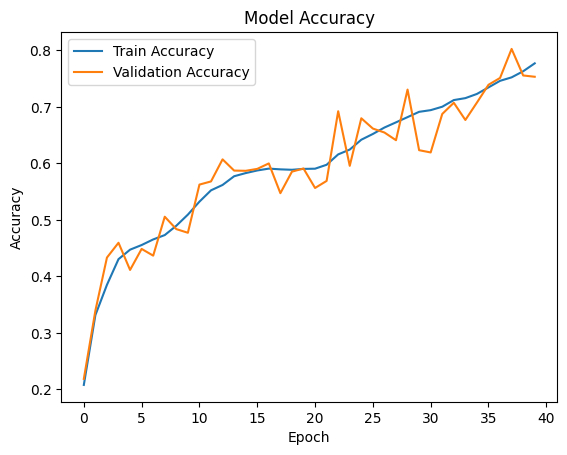

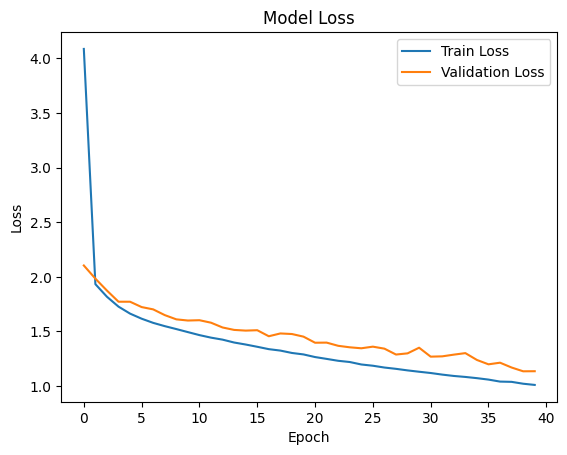

In [166]:
# STEP 3.5 — Plot training and validation accuracy/loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [167]:
# STEP 3.6 — Evaluate on the test set
test_loss, test_acc = model_A.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")


Test Accuracy: 0.7557


In [169]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import numpy as np

# Predict on test data
y_pred_probs = model_A.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# --- Overall Metrics ---
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall:    {overall_recall:.4f}")
print(f"Overall F1-score:  {overall_f1:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Overall Precision: 0.8066
Overall Recall:    0.7557
Overall F1-score:  0.7276


In [124]:
y.value_counts()


country_group
Western_Europe          11876
Africa                   6132
East_Asia                6082
Southeast_Asia           4070
Oceania                  4014
Middle_East              3983
North_America            3962
South_America            3918
North_America_Mexico     2004
South_Asia               1989
Eastern_Europe           1970
Name: count, dtype: int64

In [125]:
# check class distribution
print("Train target distribution:")
pd.Series(y_train).value_counts(normalize=True)

print("\nTest target distribution:")
pd.Series(y_test).value_counts(normalize=True)


Train target distribution:

Test target distribution:


10    0.2375
0     0.1226
1     0.1216
9     0.0814
6     0.0803
3     0.0797
4     0.0792
7     0.0784
5     0.0401
8     0.0398
2     0.0394
Name: proportion, dtype: float64

In [170]:
# STEP 4.1 — Convert scaled arrays back to DataFrames (for SHAP & LIME)
import pandas as pd

# Rebuild column names from X
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

X_train_df.head()


,user_gender,traveller_type,age_group,star_rating,score_overall,score_cleanliness,score_comfort,score_facilities,score_location,score_staff,score_value_for_money,cleanliness_base,comfort_base,facilities_base,location_base,staff_base,value_for_money_base
0,0.527756,0.529963,-0.718504,0.0,-0.240275,-0.302520,-0.529351,0.515613,-1.606363,0.070201,0.879362,-1.730167,-1.981479,-1.458414,-1.065470,-1.756410,-0.438448
1,-1.029230,1.492203,0.165352,0.0,-0.793141,-1.888907,-1.472920,-1.691824,0.056022,1.327207,1.823978,-1.730167,-0.700124,-1.458414,-0.777820,-1.333922,-0.051236
2,2.084742,-0.432277,-0.718504,0.0,0.865456,0.490673,1.357785,-1.691824,1.718408,-1.186805,0.879362,0.478978,0.154113,-0.060113,1.523372,-0.066457,0.723187
3,0.527756,1.492203,-0.718504,0.0,0.865456,0.292375,-0.765243,0.114261,-1.606363,2.584213,1.257208,0.920807,1.862587,2.386915,-1.065470,1.623496,-0.051236
4,0.527756,1.492203,0.165352,0.0,-0.793141,-0.699117,-0.765243,-1.089796,1.005957,0.321602,0.123669,0.037149,-1.127243,-0.060113,0.660425,-1.756410,-1.987294


In [171]:
# STEP 4.2 — Define prediction function for SHAP and LIME
import numpy as np

def predict_fn(X):
    """
    Returns class probabilities for SHAP/LIME.
    Input X should be a numpy array or DataFrame.
    """
    return model_A.predict(X)


In [182]:
# ###### --- 100% Working SHAP Force Plot for Sequential NN ---
# import shap
# import numpy as np

# # Subsample for speed
# background = shap.sample(X_train_df, 100, random_state=42)
# X_test_small = X_test_df.sample(5, random_state=42)

# # Try DeepExplainer first, fallback to KernelExplainer
# try:
#     explainer = shap.DeepExplainer(model_A, background)
#     shap_values = explainer.shap_values(X_test_small)
#     explainer_type = "deep"
# except Exception as e:
#     print("DeepExplainer failed → using KernelExplainer instead:", e)
#     explainer_type = "kernel"
#     explainer = shap.KernelExplainer(model_A.predict, background)
#     shap_values = explainer.shap_values(X_test_small, nsamples=100)

# # Initialize JS visualizations
# shap.initjs()

# # Pick a single test sample
# i = 2  # you can change
# cls = 0  # class index if classification

# # --- Handle SHAP structure differences safely ---
# if isinstance(shap_values, list):
#     # Multi-class or DeepExplainer
#     shap_values_display = shap_values[cls][i]
#     base_value = (
#         explainer.expected_value[cls]
#         if hasattr(explainer, "expected_value")
#         else np.mean(model_A.predict(background))
#     )
# else:
#     # KernelExplainer or PermutationExplainer (single output)
#     shap_values_display = shap_values[i]
#     if hasattr(explainer, "expected_value"):
#         base_value = explainer.expected_value
#     else:
#         base_value = np.mean(model_A.predict(background))

# # --- Plot the force plot ---
# shap.force_plot(
#     base_value,
#     shap_values_display,
#     X_test_small.iloc[i],
#     matplotlib=False
# )

import shap
import numpy as np

# Subsample background and test
background = shap.sample(X_train_df, 100, random_state=42)
X_test_small = X_test_df.sample(50, random_state=42)

# Use KernelExplainer (safe for Sequential models under eager mode)
explainer = shap.KernelExplainer(model_A.predict, background)
shap_values = explainer.shap_values(X_test_small, nsamples=100)

shap.initjs()

# Pick a test instance
i = 21

# Automatically detect predicted class for that instance
pred_class = np.argmax(model_A.predict(X_test_small.iloc[[i]]), axis=1)[0]
print("Predicted Class:", target_encoder.inverse_transform([pred_class])[0])

# Extract the relevant SHAP values for that class
shap_values_display = shap_values[pred_class][i]
base_value = np.mean(model_A.predict(background))

# Plot
shap.force_plot(
    base_value,
    shap_values_display,
    X_test_small.iloc[i],
    matplotlib=False
)






4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
313/313 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Class: North_America_Mexico
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [183]:
print("Predicted class:", np.argmax(model_A.predict(X_test_df.iloc[[i]]), axis=1))
print("Target mapping:")
print(dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted class: [8]
Target mapping:
{'Africa': 0, 'East_Asia': 1, 'Eastern_Europe': 2, 'Middle_East': 3, 'North_America': 4, 'North_America_Mexico': 5, 'Oceania': 6, 'South_America': 7, 'South_Asia': 8, 'Southeast_Asia': 9, 'Western_Europe': 10}


In [184]:
# --- Get model prediction ---
pred_class = np.argmax(model_A.predict(X_test_df.iloc[[i]]), axis=1)[0]
pred_class_name = target_encoder.classes_[pred_class]

# --- Get actual class (true label) ---
true_class_index = y_test[i]
true_class_name = target_encoder.classes_[true_class_index]

print(f"✅ Actual class index: {true_class_index}")
print(f"✅ Actual class name:  {true_class_name}")
print(f"🤖 Predicted class index: {pred_class}")
print(f"🤖 Predicted class name:  {pred_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
✅ Actual class index: 8
✅ Actual class name:  South_Asia
🤖 Predicted class index: 8
🤖 Predicted class name:  South_Asia


In [178]:
# --- LIME Explanation for Sequential NN ---
from lime import lime_tabular
import numpy as np

# Define a prediction wrapper for LIME (returns probabilities)
def predict_fn(X):
    # Model already outputs (n_samples, n_classes)
    preds = model_A.predict(X)
    # ensure it's a numpy array, not Tensor
    return np.array(preds)


# Create LIME explainer
lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_df),
    feature_names=X_train_df.columns.tolist(),
    class_names=target_encoder.classes_.tolist(),  # ✅ the correct encoder
    mode='classification'
)


# Pick one test instance to explain
# Pick one test instance to explain
j = 1

# Get model prediction (class index)
pred_class = np.argmax(model_A.predict(X_test_df.iloc[[j]]), axis=1)[0]
print("Predicted class index:", pred_class)
print("Predicted class name:", target_encoder.classes_[pred_class])

# Generate explanation for that exact class
exp = lime_explainer.explain_instance(
    data_row=X_test_df.iloc[j].to_numpy(),
    predict_fn=predict_fn,
    num_features=17,
    labels=[pred_class]  # 👈 force LIME to explain the predicted class
)

# Show explanation
exp.show_in_notebook(show_table=True, labels=[pred_class])


# (Optional) save to HTML file if the above doesn't render
exp.save_to_file('lime_explanation.html')
# print("Predicted class:", np.argmax(model_A.predict(X_test_df.iloc[[j]]), axis=1))
# --- Get model prediction ---
pred_class = np.argmax(model_A.predict(X_test_df.iloc[[j]]), axis=1)[0]
pred_class_name = target_encoder.classes_[pred_class]

# --- Get actual class (true label) ---
true_class_index = y_test[j]
true_class_name = target_encoder.classes_[true_class_index]

print(f"✅ Actual class index: {true_class_index}")
print(f"✅ Actual class name:  {true_class_name}")
print(f"🤖 Predicted class index: {pred_class}")
print(f"🤖 Predicted class name:  {pred_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted class index: 2
Predicted class name: Eastern_Europe
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
✅ Actual class index: 2
✅ Actual class name:  Eastern_Europe
🤖 Predicted class index: 2
🤖 Predicted class name:  Eastern_Europe


In [ ]:
# # --- LIME Explanation for Sequential NN ---
# from lime import lime_tabular
# import numpy as np

# # Define a prediction wrapper for LIME (returns probabilities)
# def predict_fn(X):
#     preds = model_A.predict(X)
#     # ensure 2D output for classification
#     if preds.ndim == 1:
#         preds = np.vstack([1 - preds, preds]).T
#     return preds

# # Create LIME explainer
# lime_explainer = lime_tabular.LimeTabularExplainer(
#     training_data=np.array(X_train_df),
#     feature_names=X_train_df.columns.tolist(),
#     class_names=[str(c) for c in target_encoder.classes_],
#     mode='classification'
# )

# # Pick one test instance to explain
# j = 3  # you can change this to explain a different row

# # Generate explanation
# exp = lime_explainer.explain_instance(
#     data_row=X_test_df.iloc[j].to_numpy(),
#     predict_fn=predict_fn,
#     num_features=8  # how many top features to show
# )

# # Show explanation interactively in the notebook
# exp.show_in_notebook(show_table=True)

# # (Optional) save to HTML file if the above doesn't render
# exp.save_to_file('lime_explanation.html')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
157/157 ━━━━━

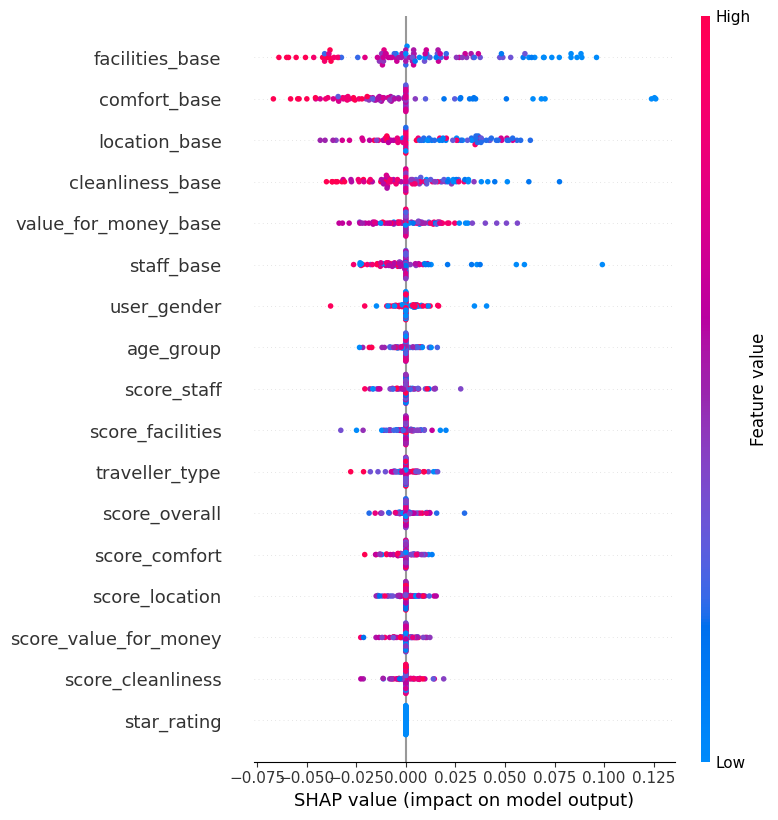

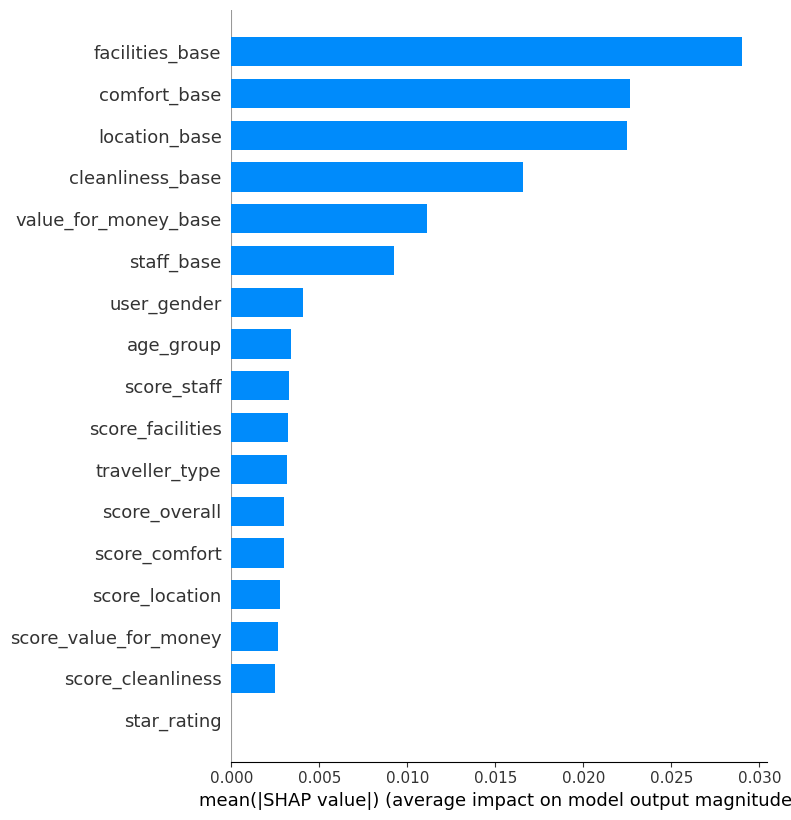

In [185]:
# --- GLOBAL SHAP IMPORTANCE (SUMMARY PLOTS) ---
import shap

# Use a smaller subset of the test data for speed
X_test_small = X_test_df.sample(100, random_state=42)
background = shap.sample(X_train_df, 50, random_state=42)

# Use KernelExplainer since DeepExplainer fails in TF ≥2.6
explainer = shap.KernelExplainer(model_A.predict, background)
shap_values = explainer.shap_values(X_test_small, nsamples=100)

# --- Convert shap_values to correct array form ---
# If the output is a list (multi-class), take first class for visualization
if isinstance(shap_values, list):
    shap_values_display = shap_values[0]
else:
    shap_values_display = shap_values

# --- GLOBAL FEATURE IMPORTANCE (DOT PLOT) ---
shap.summary_plot(
    shap_values_display,
    X_test_small,
    feature_names=X_test_small.columns,
    plot_type='dot'
)

# --- GLOBAL FEATURE IMPORTANCE (BAR PLOT) ---
shap.summary_plot(
    shap_values_display,
    X_test_small,
    feature_names=X_test_small.columns,
    plot_type='bar'
)


In [206]:
import numpy as np
import pandas as pd

def predict_country_group(raw_input: dict):
    input_df = pd.DataFrame([raw_input])

    # --- fill in any missing columns with 0 or a neutral default ---
    for col in scaler.feature_names_in_:
        if col not in input_df.columns:
            input_df[col] = 0  # or another sensible default value

    input_df = input_df[scaler.feature_names_in_]  # reorder columns correctly

    for col, le in encoders.items():
        if col in input_df.columns:
            input_df[col] = input_df[col].apply(lambda x: x if x in le.classes_ else le.classes_[0])
            input_df[col] = le.transform(input_df[col])

    input_scaled = scaler.transform(input_df)
    y_pred_proba = model_A.predict(input_scaled)
    y_pred_class = np.argmax(y_pred_proba, axis=1)
    predicted_group = target_encoder.inverse_transform(y_pred_class)

    return predicted_group[0]



In [210]:
def predict_country_group(raw_input):
    """
    Takes a raw dictionary of user/hotel input and returns the predicted country group.
    Handles encoding, scaling, and missing features consistently.
    """
    # Convert input to DataFrame
    input_df = pd.DataFrame([raw_input])

    # --- 1️⃣ Encode categorical features safely ---
    for col, le in encoders.items():
        if col in input_df.columns:
            val = input_df.at[0, col]
            if val in le.classes_:
                input_df[col] = le.transform([val])
            else:
                # Use most frequent class as fallback instead of -1
                most_common = np.bincount(le.transform(le.classes_)).argmax()
                input_df[col] = most_common

    # --- 2️⃣ Ensure all expected columns are present ---
    for col in X_train_df.columns:
        if col not in input_df.columns:
            input_df[col] = X_train_df[col].mean()  # neutral fill with training mean

    # Reorder columns to match training data
    input_df = input_df[X_train_df.columns]

    # --- 3️⃣ Scale numeric features ---
    input_scaled = scaler.transform(input_df)

    # --- 4️⃣ Predict ---
    probs = model_A.predict(input_scaled)
    pred_class = np.argmax(probs, axis=1)[0]
    predicted_label = target_encoder.inverse_transform([pred_class])[0]

    return predicted_label


In [215]:
example_1 = {
    'user_gender': 'Female',
    'age_group': '55+',
    'traveller_type': 'Business',
    'star_rating': 1,
    'cleanliness_base': 1.5,
    'comfort_base': 0.2,
    'facilities_base': 2.7,
    'location_base': 1.0,
    'staff_base': 8.8,
    'value_for_money_base': 9.0,
    'score_cleanliness': 3.9,
    'score_comfort': 1.7,
    'score_facilities': 6.6,
    'score_location': 1.1,
    'score_staff': 1.8,
    'score_value_for_money': 1.2
}

print("Predicted Country Group:", predict_country_group(example_1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Country Group: North_America_Mexico


invalid value encountered in less


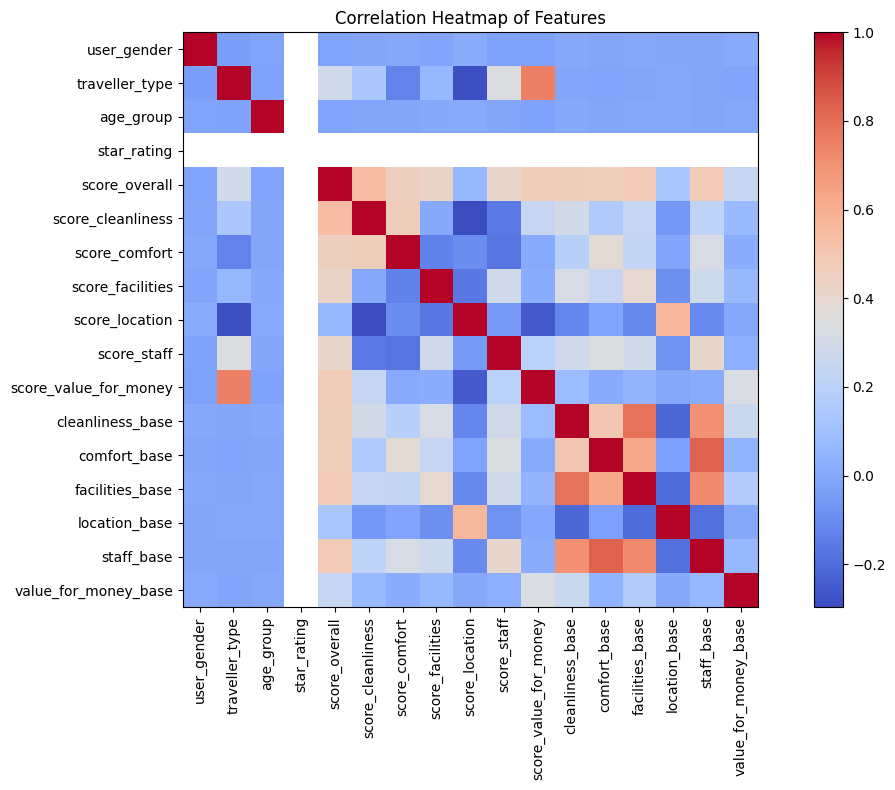

In [201]:
import matplotlib.pyplot as plt
import pandas as pd

# assuming you have your final processed DataFrame before splitting:
corr = X.corr()

plt.figure(figsize=(12, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.title('Correlation Heatmap of Features')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()


In [202]:
print(X.columns)
print(X['star_rating'].unique())
print(X['star_rating'].dtype)


Index(['user_gender', 'traveller_type', 'age_group', 'star_rating',
       'score_overall', 'score_cleanliness', 'score_comfort',
       'score_facilities', 'score_location', 'score_staff',
       'score_value_for_money', 'cleanliness_base', 'comfort_base',
       'facilities_base', 'location_base', 'staff_base',
       'value_for_money_base'],
      dtype='object')
[5]
int64


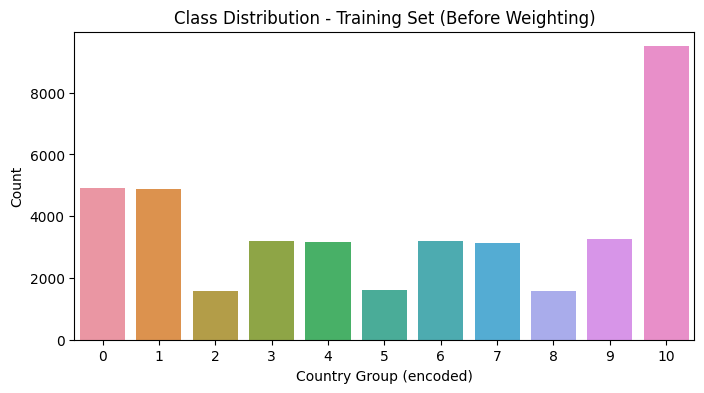

In [203]:
import seaborn as sns

plt.figure(figsize=(8,4))
sns.countplot(x=y_train)
plt.title("Class Distribution - Training Set (Before Weighting)")
plt.xlabel("Country Group (encoded)")
plt.ylabel("Count")
plt.show()


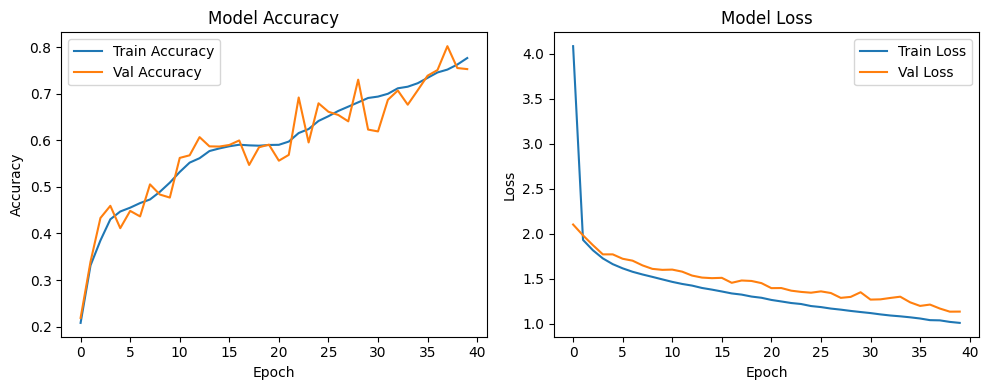

In [204]:
plt.figure(figsize=(10,4))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


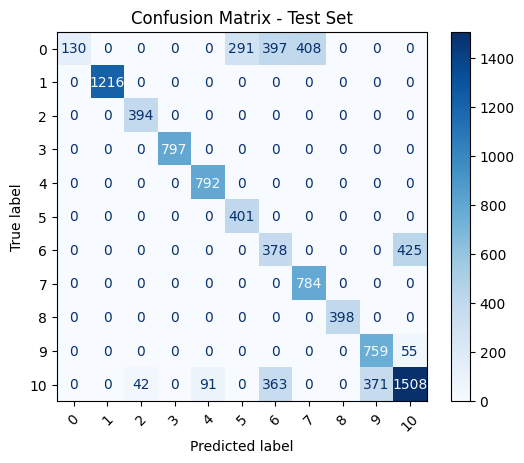

In [205]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_probs = model_A.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Test Set")
plt.show()
